In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# we will import housing datasets
df = pd.read_csv('Housing.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')

In [6]:
df.shape

(546, 13)

In [12]:
#we will only use price and lotsize columns
df = df[['price', 'lotsize']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f44810a20>,
      dtype=object)

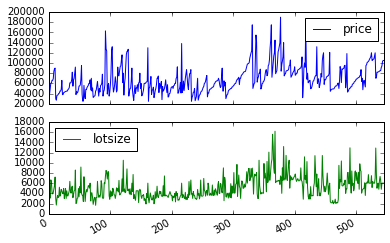

In [13]:
# let's plot these fuckers
%matplotlib inline
df.plot(subplots=True)

In [125]:
# we can see that there is relation in lotsize and price
# there is no big trend and seasonality as such
# so let's directly fit random forest
X = df['lotsize']
y = df['price']

x_train = X[X.index < 400]
x_test = X[X.index >= 400]
y_train = y[y.index < 400]
y_test = y[y.index >= 400]

In [118]:
#let's import random forest model
from sklearn.ensemble.forest import RandomForestRegressor

In [119]:
#build the model
model = RandomForestRegressor(n_estimators=100, max_features=1,oob_score=True)

In [120]:
model.fit(x_train[:, None], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [121]:
model.score(x_test[:, None], y_test)

-0.08427941409232997

In [122]:
y_pred = model.predict(x_train[:, None])

In [126]:
y_train = y_train.values
y_test = y_test.values

In [127]:
df_pred = pd.DataFrame(list(zip(y_train, y_pred)), columns=['price', 'predicted_price']) 

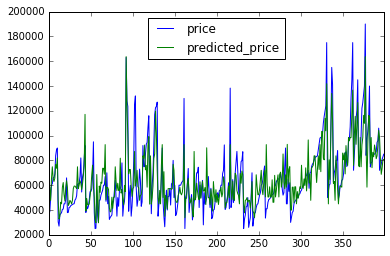

In [128]:
df_pred.plot()

In [129]:
# It looks pretty decent. Let's check r2 score and mse
from sklearn.metrics import r2_score, mean_squared_error

In [130]:
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

In [131]:
print("re score is:", r2)

re score is: 0.6991521596914465


In [132]:
#score is decent on traing data. what about testing data?
y_pred = model.predict(x_test[:, None])

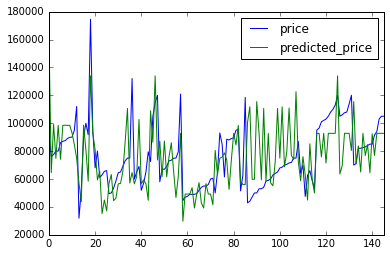

In [134]:
df_pred = pd.DataFrame(list(zip(y_test, y_pred)), columns=['price', 'predicted_price']) 
df_pred.plot()

In [137]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("r2 score is:", r2)

r2 score is: -0.08427941409232997


In [ ]:
#Not perfo